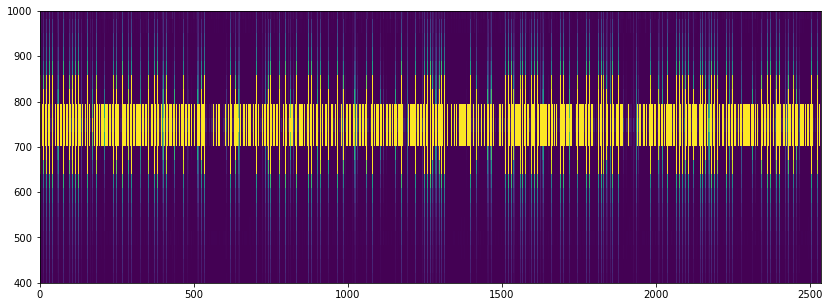

In [9]:
import scipy.io.wavfile as wav
import scipy.signal as signal
from matplotlib import pyplot as plt
import numpy as np

sample_rate, samples = wav.read("data/arrl-example-18wpm.wav")
f, t, Zxx = signal.stft(samples, fs=8000)
plt.figure(figsize=(14, 5))
plt.ylim(400, 1000)
_ = plt.pcolormesh(t, f, np.abs(Zxx), shading='auto', vmax=1000)


In [13]:
int(np.argmax(f[:]))

128

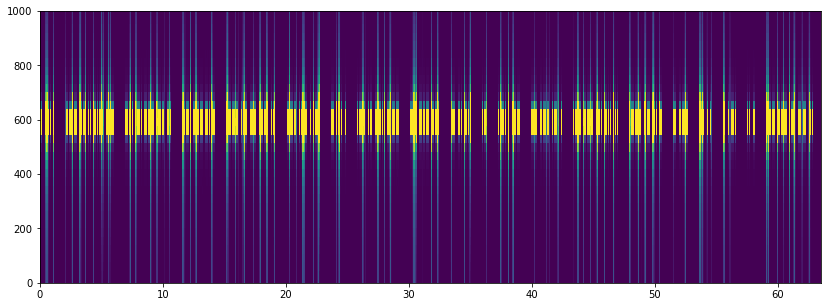

In [14]:
sample_rate, samples = wav.read("data/generated-example.wav")
f, t, Zxx = signal.stft(samples, fs=8000)
plt.figure(figsize=(14, 5))
plt.ylim(0, 1000)
_ = plt.pcolormesh(t, f, np.abs(Zxx), shading='auto', vmax=1000)

In [ ]:
import cv2
from scipy.io import wavfile

from matplotlib.mlab import specgram
nfft = 256
overlap = nfft - 56  # overlap value for spectrogram

def get_specgram(signal, rate):
    arr2D, freqs, bins = specgram(
        signal,
        window=np.blackman(nfft),
        Fs=rate,
        NFFT=nfft,
        noverlap=overlap,
        pad_to=32 * nfft,
    )
    return arr2D, freqs, bins

def plot_image(arr2D, bins, freqs):
    fig, ax = plt.subplots(1,1)
    extent = (bins[0], bins[-1], freqs[-1], freqs[0])
    im = ax.imshow(
        arr2D,
        aspect="auto",
        extent=extent,
        interpolation="none",
        cmap="Greys",
        norm=None,
    )
    plt.gca().invert_yaxis()
    plt.show()

def normalize_image(img):
    # normalize
    (m, s) = cv2.meanStdDev(img)
    m = m[0][0]
    s = s[0][0]
    img = img - m
    img = img / s if s>0 else img
    return img


def create_image(filename):
    imgSize=(256, 32)
    dataAugmentation=False

    imgname = filename+".png"   

    # Load  image in grayscale if exists
    img = cv2.imread(imgname, 0) 

    # TODO: re-enable this IF statement
    #if img is None:
    rate, data = wavfile.read(filename)
    arr2D, freqs, bins = get_specgram(data, rate)

    # Get the image data array shape (Freq bins, Time Steps)
    shape = arr2D.shape

    # Find the CW spectrum peak - look across all time steps
    f = int(np.argmax(arr2D[:]) / shape[1])

    time_steps = (4.0/(len(data)/rate))*shape[1]

    # Create a 32x128 array centered to spectrum peak
    img = cv2.resize(arr2D[f - 16 : f + 16][:], imgSize)

    img = normalize_image(img)

    cv2.imwrite(imgname, img*256.)

    img = normalize_image(img)  
    # transpose for TF
    img = cv2.transpose(img)
    return img


In [ ]:
create_image('data/C.wav')
from IPython.display import Image
Image(filename='data/C.wav.png') 

In [ ]:
def get_spectrogram(waveform):
  # Padding for files with less than 256000 samples
  #print("Len: {}".format(tf.shape(waveform)))
  zero_padding = tf.zeros([100000] - tf.shape(waveform), dtype=tf.float32)

  # Concatenate audio with padding so that all audio clips will be of the 
  # same length
  waveform = tf.cast(waveform, tf.float32)
  equal_length = tf.concat([waveform, zero_padding], 0)
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  #spectrogram = tf.expand_dims(equal_length, axis=0)
  spectrogram = tf.abs(spectrogram)

  return spectrogram


In [ ]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(audio_binary)
  return tf.squeeze(audio, axis=-1)


In [ ]:
s = get_spectrogram(decode_audio())

In [ ]:
for t in s.numpy():
    print(t)